<a href="https://colab.research.google.com/github/abhinav-exp/Forecasting-CryptoCurrency-Prices/blob/master/TFLANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
GitHubDataLink = 'https://raw.githubusercontent.com/abhinav-exp/Forecasting-CryptoCurrency-Prices/master/Datasets/'
InputFileLink = GitHubDataLink + 'DataBTC2017.csv'
data1 = pd.read_csv(InputFileLink, header=0, index_col=0)
print(data1)

            CBBTCUSD
DATE                
2017-06-18   2515.25
2017-06-19   2596.98
2017-06-20   2725.08
2017-06-21   2643.35
2017-06-22   2679.99
...              ...
2019-08-03  10820.75
2019-08-04  10997.82
2019-08-05  11775.14
2019-08-06  11440.08
2019-08-07  12014.41

[781 rows x 1 columns]


In [3]:
data1min = data1.min()
data1max = data1.max()

normalize = lambda x: (x - data1min + 1)/(data1max - data1min + 2)
data2 = normalize(data1)
print(data2)

            CBBTCUSD
DATE                
2017-06-18  0.034073
2017-06-19  0.038680
2017-06-20  0.045901
2017-06-21  0.041294
2017-06-22  0.043360
...              ...
2019-08-03  0.502247
2019-08-04  0.512228
2019-08-05  0.556045
2019-08-06  0.537158
2019-08-07  0.569532

[781 rows x 1 columns]


In [4]:
def split_sequence(sequence, n_steps):
  X= list()
  for i in range(len(sequence) - n_steps):
    end_ix = i + n_steps
    seq_x= sequence.values[i:end_ix, 0]
    X.append(seq_x) 
  return pd.DataFrame(X)

data3 = split_sequence(data2, 10)
print(data3.shape)
print(data3)

(771, 10)
            0         1         2         3         4         5         6  \
0    0.034073  0.038680  0.045901  0.041294  0.043360  0.043967  0.037432   
1    0.038680  0.045901  0.041294  0.043360  0.043967  0.037432  0.033530   
2    0.045901  0.041294  0.043360  0.043967  0.037432  0.033530  0.028023   
3    0.041294  0.043360  0.043967  0.037432  0.033530  0.028023  0.037484   
4    0.043360  0.043967  0.037432  0.033530  0.028023  0.037484  0.036208   
..        ...       ...       ...       ...       ...       ...       ...   
766  0.441959  0.449255  0.447073  0.426045  0.430599  0.427984  0.432307   
767  0.449255  0.447073  0.426045  0.430599  0.427984  0.432307  0.461562   
768  0.447073  0.426045  0.430599  0.427984  0.432307  0.461562  0.479501   
769  0.426045  0.430599  0.427984  0.432307  0.461562  0.479501  0.486030   
770  0.430599  0.427984  0.432307  0.461562  0.479501  0.486030  0.502247   

            7         8         9  
0    0.033530  0.028023  0.03

In [5]:
train_x = data3.iloc[:int(0.85*len(data2)), :9]
train_y = data3.iloc[:int(0.85*len(data2)), 9:10]
test_x = data3.iloc[int(0.85*len(data2)):, :9]
test_y = data3.iloc[int(0.85*len(data2)):, 9:10]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(663, 9)
(663, 1)
(108, 9)
(108, 1)


In [102]:
class TFLANN():
  def __init__(self, learn_rate):
    self.learning_rate = learn_rate
    self.weight_matrix = 2*np.random.random((9*3 + 1, 1)) - 1
  
  def func_x(self, x):
    const_x = np.ones((len(x), 1))
    orginal_x = x
    sinned_x = np.sin(np.pi*x)
    cossed_x = np.cos(np.pi*x)
    functioned_x = np.hstack((x, sinned_x, cossed_x, const_x))
    return functioned_x

  def tanh_derivative(self, x):
    return 1.0 - (np.tanh(x) ** 2)

  def forward_propagation(self, x):
    funced_x = self.func_x(x)
    return np.tanh(np.dot(funced_x, self.weight_matrix))

  def train(self, train_x, train_y, epochs):
    self.me_curve = np.array([])
    for iteration in range(epochs):
      y = self.forward_propagation(train_x)

      error = train_y - y

      adjustment = np.dot( self.learning_rate * self.func_x(train_x).T, error * self.tanh_derivative(y))

      self.weight_matrix += adjustment
      self.me_curve = np.append(self.me_curve, np.mean(error[9]**2))
      # print(self.mse_curve)
      # print(str(np.mean(error[9] ** 2)) + "\t" + str(np.mean(abs(error[9]))) + "\t" + str(np.mean(train_y[9])) + "\t" + str(np.mean(y[:, 0])) + "\t" + str(np.mean(adjustment[:,0]))) 

0.00045 => 0.06381749556804943
0.0004 => 0.0006868191828813256
0.00035 => 0.0009573606328070422
0.0003 => 0.000795259170380819
0.00025 => 0.0011440240806759496
0.0002 => 0.0010829779575784863
0.00015 => 0.0009401395476664512
0.0001 => 0.0018887077223398547


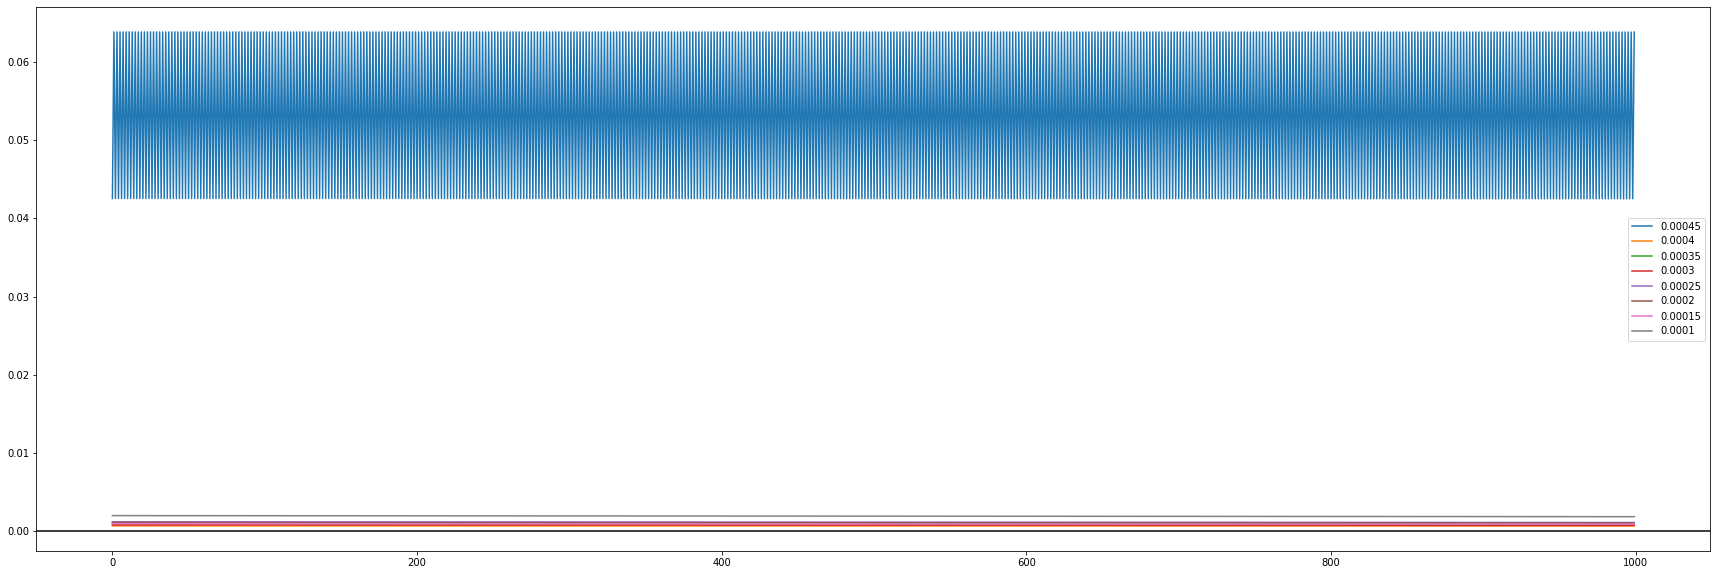

In [103]:
tuning_learning_rates = [0.00045, 0.0004, 0.00035,  0.0003, 0.00025, 0.0002, 0.00015, 0.0001]

plt.figure(figsize = (30, 10))

for t in tuning_learning_rates:
  m = TFLANN(t)
  m.train(train_x = train_x, train_y = train_y, epochs = 10000)
  ec = m.me_curve[-1001:-1]
  print(str(t) + " => " + str(ec[-1]))
  plt.plot(ec)

plt.legend([str(u) for u in tuning_learning_rates])
plt.axhline(y=0, c="black", label="y=0")
plt.show()

In [104]:
model = TFLANN(0.00035)
model.train(train_x = train_x, train_y = train_y, epochs = 10000)
preds = model.forward_propagation(test_x)
print(preds.shape)

(108, 1)


0.0007986250162879407


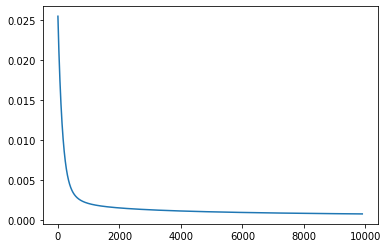

In [105]:
error_curve = model.me_curve[100:]
print(error_curve[-1])
plt.plot(error_curve)
plt.show()

In [106]:
preds[:, 0]

array([0.19013668, 0.18925715, 0.19357951, 0.19670067, 0.20154164,
       0.19200041, 0.18312095, 0.18536737, 0.19431447, 0.18859811,
       0.18943758, 0.19450922, 0.19819182, 0.1999933 , 0.20980386,
       0.21264605, 0.206111  , 0.20736399, 0.21998713, 0.2327303 ,
       0.24255858, 0.27982128, 0.2925833 , 0.32079478, 0.34315579,
       0.36115123, 0.35228968, 0.30392726, 0.3039729 , 0.34560991,
       0.36472802, 0.33683457, 0.31110624, 0.32607585, 0.36448581,
       0.34853589, 0.3819982 , 0.40020856, 0.39617222, 0.38773693,
       0.3657453 , 0.38200902, 0.38104675, 0.38260495, 0.35253605,
       0.30177703, 0.32333241, 0.32846156, 0.34401827, 0.32373764,
       0.31562529, 0.33677725, 0.34771627, 0.35604028, 0.36105903,
       0.37900408, 0.41319994, 0.40935982, 0.43413137, 0.42595884,
       0.42709665, 0.44678046, 0.48294091, 0.53015889, 0.52540303,
       0.54279912, 0.58649014, 0.66620875, 0.5912398 , 0.54959809,
       0.63869394, 0.49547613, 0.50364651, 0.43880293, 0.61242

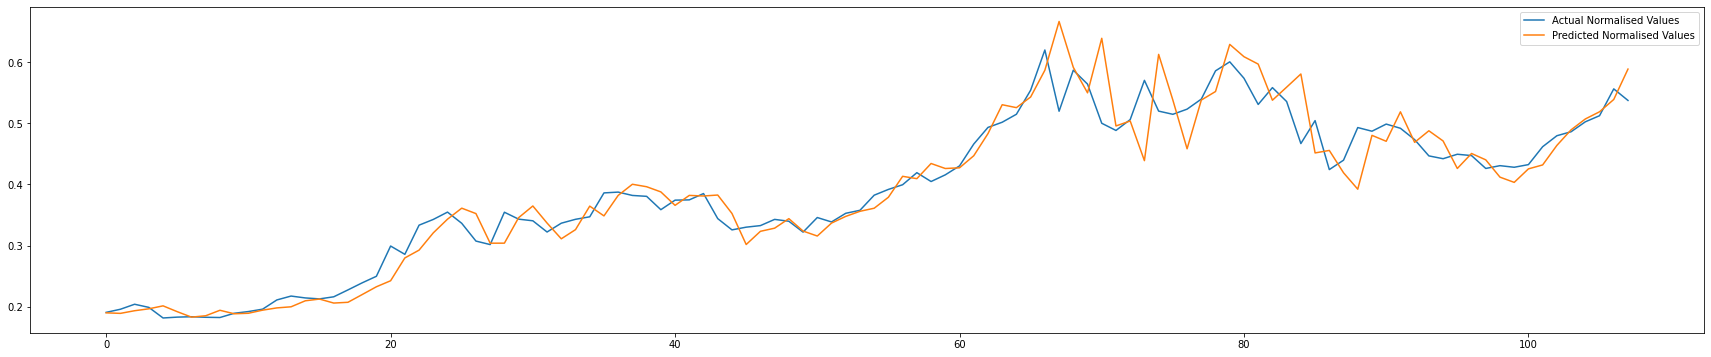

In [107]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(preds)
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()
     

In [108]:
d1 = (data1max - data1min + 2)[0]
print(type(d1))
denormalized_preds = (preds*d1)[:,0]
# print(denormalized_preds)
denormalized_preds += (data1min + 1)[0]
# print(denormalized_preds)
preds1 = pd.DataFrame(denormalized_preds)
preds1['DATE'] = data1.index[-1*len(preds1):]
preds1 = preds1.set_index('DATE')
print(preds1)

<class 'numpy.float64'>
                       0
DATE                    
2019-04-22   5285.848448
2019-04-23   5270.245302
2019-04-24   5346.925118
2019-04-25   5402.295153
2019-04-26   5488.175046
...                  ...
2019-08-03  10590.290295
2019-08-04  10904.824965
2019-08-05  11113.754618
2019-08-06  11470.157516
2019-08-07  12350.946024

[108 rows x 1 columns]


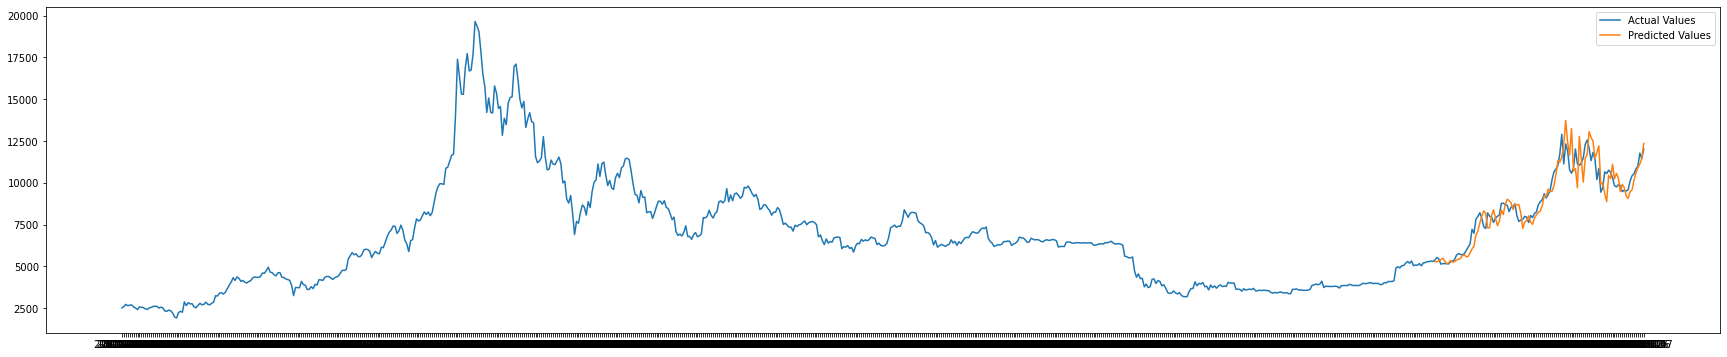

In [109]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

In [112]:
mse = np.mean((np.array(preds1[0]) - np.array(data1.iloc[-1*(len(preds1)):, 0]))**2)
print("mse  "+ str(mse))
print("rmse "+ str(np.sqrt(mse)))

mse  521916.2333363837
rmse 722.4377020452239
